![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [1]:
import numpy as np
from numpy import infty

In [2]:
def absrel(a,b):
    abs_error = np.abs(a - b) / 2
    if a*b > 0:
        smaller = a
        if np.abs(b) < np.abs(a):
            smaller = b
        rel_error = np.abs(abs_error/smaller)
    else:
        rel_error = infty
    return (abs_error, rel_error)

In [3]:
absrel(10,11)

(0.5, 0.05)

In [4]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [5]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

Por que em um intervalo qualquer que contenha o número $zero$ (0), o valor do erro relativo vai considerar uma possível raiz para a função que pode ser tão próxima de zero quanto queiramos. Nesse contexto, quanto mais próximo de zero for a raiz, maior será o erro relativo, porque a fórmula do erro relativo contém o valor correto no denominador de uma fração.

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [6]:
def bissecao(f, a, b, abstol=1e-10, reltol=1e-10):
    """
    Considere os parâmetros de bissecao:
    f - função a ter o zero encontrado.
    a - valor inicial do intervalo de procura
    b - valor final do intervalo de procura
    abstol - tolerância máxima do erro absoluto
    reltol - tolerância máxima de erro relativo
    
    Essa função vai dividindo o intervalo dado por [a, b] pela metade, incrementalmente, comparando o valor de 
    f(c = (a+b)/2) com o valor f(a) inicial, para ver se o valor de f(c) ultrapassa o zero da função (em 
    relação a f(a)) ou não.
    
    Com isso, os intervalos vão se reduzindo gradualmente, em torno do zero, até que a diferença entre a e b seja
    menor do que o valor dado em abstol, e que o erro relativo em relação ao zero da função, seja menor do que
    reltol.
    
    Exemplos:
    
    >>> bissecao(np.cos, 1,5)
    (1.5707963267923333, 5.820766091346741e-11, 3.705614784221461e-11)
    
    No exemplo acima, o valor do zero do cosseno, entre 1 e 5, é pi/2, que é aproximada 1,57, como o mostrado
    acima.
    
    O valor de retorno é uma tupla, com três valores:
    * O valor aproximado encontrado para o zero da função
    * O erro absoluto máximo possível para o zero
    * O erro relativo máximo possível para o zero
    """
    va = f(a)
    if(va == 0):
        return (a, 0, 0)
    else:
        vb = f(b)
        if(vb == 0):
            return (b, 0, 0)
        else:
            vi = float('inf')
            top = a
            bottom = b
            while True: #np.abs(top - bottom) > tol and np.abs(vi) > err:
                abs_error, rel_error = absrel(bottom, top)
                i = (top + bottom) / 2
                if abs_error < abstol and rel_error < reltol:
                    return (i, abs_error, rel_error)
                vi = f(i)
                if vi * va < 0:
                    bottom = i
                else:
                    top = i

Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [7]:
bissecao(np.cos, 1,5)

(1.5707963267923333, 5.820766091346741e-11, 3.705614784221461e-11)

In [8]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [9]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

In [10]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [11]:
x,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [12]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,
em ordem decrescente.

In [13]:
def bissecao_extremidades(f,a,b, abstol=1e-10,reltol=1e-10):
    """ Considere os parâmetros de bissecao:
    f - função a ter o zero encontrado.
    a - valor inicial do intervalo de procura
    b - valor final do intervalo de procura
    abstol - tolerância máxima do erro absoluto
    reltol - tolerância máxima de erro relativo
    
    Essa função vai dividindo o intervalo dado por [a, b] pela metade, incrementalmente, comparando o valor de 
    f(c = (a+b)/2) com o valor f(a) inicial, para ver se o valor de f(c) ultrapassa o zero da função (em 
    relação a f(a)) ou não.
    
    Com isso, os intervalos vão se reduzindo gradualmente, em torno do zero, até que a diferença entre a e b seja
    menor do que o valor dado em abstol, e que o erro relativo em relação ao zero da função, seja menor do que
    reltol.
    
    O valor de retorno é uma lista dos intervalos nos quais, possivelmente, o zero está presente. Ou seja, cada
    elemento da lista retornada é uma dupla com um intervalo no qual, possivelmente, o zero está presente.
    Espera-se que, nessa lista, os invervalos se tornem cada vez menores, indicando que a possibilidade de erro do
    zero em relação às extremidades do intervalo sejam cada vez menores.
    """
    va = f(a)
    vb = f(b)
    intervals = [(a,b)]
    if(va == 0 or vb == 0):
        return intervals
    else:
        vi = float('inf')
        top = a
        bottom = b
        while True: #np.abs(top - bottom) > tol and np.abs(vi) > err:
            abs_error, rel_error = absrel(bottom, top)
            i = (top + bottom) / 2
            if abs_error < abstol and rel_error < reltol:
                return intervals
            vi = f(i)
            if vi * va < 0:
                bottom = i
            else:
                top = i
            intervals.append((bottom, top))

In [14]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

(1, 5)
(5, 3.0)
(4.0, 3.0)
(3.5, 3.0)
(3.25, 3.0)


In [15]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-10
assert 35 <= len(lista_intervalos) <= 40

In [16]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [17]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [18]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

assert 40 <= len(lista_intervalos) <= 45

## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [19]:
import matplotlib.pyplot as plt

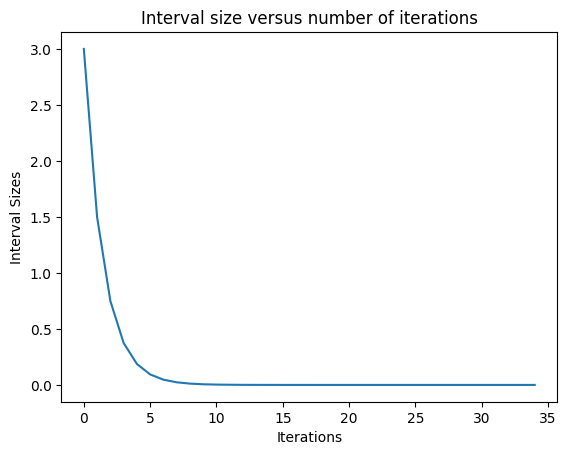

In [20]:
a, b = 0, 3
interval_sizes = np.array([np.abs(i[0] - i[1]) for i in bissecao_extremidades(np.cos, a, b)])
interval_iteration = np.array(range(len(interval_sizes)))

plt.xlabel("Iterations")
plt.ylabel("Interval Sizes")
plt.title("Interval size versus number of iterations")
plt.plot(interval_iteration, interval_sizes)

# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()

In [21]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [22]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

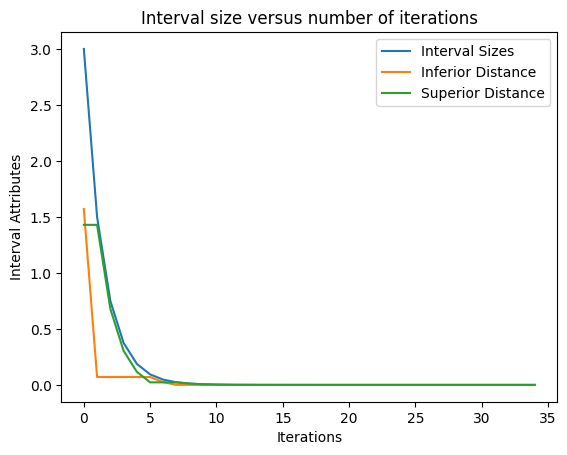

In [23]:
a, b = 0, 3
zero = np.pi/2
extremities = bissecao_extremidades(np.cos, a, b)
interval_sizes = np.array([np.abs(i[0] - i[1]) for i in extremities])
inferior_distance = np.array([np.abs(min(i) - zero) for i in extremities])
superior_distance = np.array([np.abs(max(i) - zero) for i in extremities])
interval_iteration = np.array(range(len(interval_sizes)))

plt.xlabel("Iterations")
plt.ylabel("Interval Attributes")
plt.title("Interval size versus number of iterations")
plt.plot(interval_iteration, interval_sizes, label="Interval Sizes")
plt.plot(interval_iteration, inferior_distance, label="Inferior Distance")
plt.plot(interval_iteration, superior_distance, label="Superior Distance")
plt.legend()

ax = plt.gca()

In [24]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

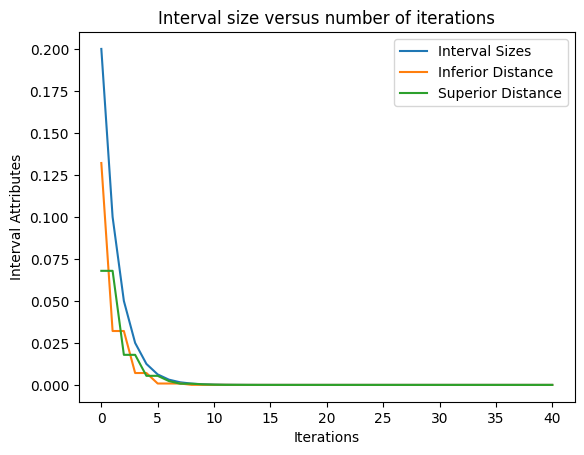

In [25]:
a, b = 1.4, 1.6
zero = 1.532088886238
extremities = bissecao_extremidades(f, a, b, 1e-13, 1e-13)
interval_sizes = np.array([np.abs(i[0] - i[1]) for i in extremities])
inferior_distance = np.array([np.abs(min(i) - zero) for i in extremities])
superior_distance = np.array([np.abs(max(i) - zero) for i in extremities])
interval_iteration = np.array(range(len(interval_sizes)))

plt.xlabel("Iterations")
plt.ylabel("Interval Attributes")
plt.title("Interval size versus number of iterations")
plt.plot(interval_iteration, interval_sizes, label="Interval Sizes")
plt.plot(interval_iteration, inferior_distance, label="Inferior Distance")
plt.plot(interval_iteration, superior_distance, label="Superior Distance")
plt.legend()

ax = plt.gca()

In [26]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [27]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

O valor do erro para as extremidades se alternam entre qual é o maior e o menor, a cada iteração. Explicando melhor, isso significa que, se na iteração $i_n$ é a extremidade superior que tem o maior erro, então, na iteração $i_{n+1}$, será a extremidade inferior que terá o maior erro e vice-versa.